# 사전 종목 선택 방법: 모멘텀(1개월)

# 모멘텀 전략
* 최근에 가장 많이 오른 종목 매수한 후 일정 기간을 보유한 후 파는 전략
* 20 영업일 수익률 순위 보여줌
* https://wikidocs.net/84318

In [3]:
!pip install -q install finance-datareader

In [5]:
!pip install pykrx

     |████████████████████████████████| 81 kB 9.5 MB/s 
     |████████████████████████████████| 60 kB 8.0 MB/s 
     |████████████████████████████████| 251 kB 41.9 MB/s 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from pykrx import stock
import datetime

In [7]:
# 오늘 KOSPI&KOSDAQ 종목 전체 불러오기
today = datetime.datetime.today().strftime("%Y%m%d")
kospi = stock.get_market_fundamental_by_ticker(today, market='KOSPI').index
kosdaq = stock.get_market_fundamental_by_ticker(today, market='KOSDAQ').index
stocks = kospi.append(kosdaq)
stocks

Index(['095570', '006840', '027410', '282330', '138930', '001460', '001465',
       '001040', '079160', '00104K',
       ...
       '065510', '243070', '084110', '263920', '145020', '024060', '010240',
       '189980', '037440', '238490'],
      dtype='object', name='티커', length=2391)

## 1개월 모멘텀

In [8]:
def momentum_1month(stocks): # 종목 list넣으면, 모멘텀 순위 있는 데이터프레임 출력
    df = pd.DataFrame()
    for s in stocks:
      df[s] = fdr.DataReader( s, '2021-01-01')['Close']
    
    # 60 영업일 수익률
    return_df = df.pct_change(20)
    return_df
    
    # 오늘 날짜
    today = datetime.datetime.today().strftime("%Y-%m-%d")
    
    # index는 종목 코드이고 모멘텀 데이터 있는 데이터 프레임으로 만들기
    s = return_df.loc[today]
    momentum_df = pd.DataFrame(s)
    momentum_df.columns = ["모멘텀"]
    
    momentum_df['순위'] = momentum_df['모멘텀'].rank(ascending=False)
    momentum_df = momentum_df.sort_values(by='순위')
    return momentum_df # 모멘텀

In [ ]:
momentum_1month_rank = momentum_1month(stocks)

In [ ]:
momentum_1month_rank.head(30)

In [ ]:
momentum_1month_rank.tail(30)

## 미리 csv 파일로 저장해 둔 모멘텀 1개월 결과 불러오기

In [19]:
momentum_1month_rank = pd.read_csv('momentum_1month_rank.csv')
momentum_1month_rank

,Unnamed: 0,모멘텀,순위
0,043100,1.738095,1.0
1,057880,1.141834,2.0
2,383310,1.017606,3.0
3,014285,1.008955,4.0
4,002410,0.936989,5.0
...,...,...,...
2385,006345,-0.457778,2386.0
2386,221610,-0.523729,2387.0
2387,137310,NaN,NaN
2388,357580,NaN,NaN


In [24]:
momentum_1month_rank = momentum_1month_rank.drop('Unnamed: 0', axis=1)

,모멘텀,순위
Unnamed: 0,,
043100,1.738095,1.0
057880,1.141834,2.0
383310,1.017606,3.0
014285,1.008955,4.0
002410,0.936989,5.0
...,...,...
006345,-0.457778,2386.0
221610,-0.523729,2387.0
137310,NaN,NaN


## 급등주 종목 저장

In [25]:
import requests

In [26]:
assets = np.array(momentum_1month_rank.index[:30])
assets

array(['043100', '057880', '383310', '014285', '002410', '064550',
       '189330', '189860', '289220', '043360', '011000', '085670',
       '215090', '130660', '069410', '301300', '150840', '185490',
       '299900', '079170', '006660', '205470', '256840', '086960',
       '011700', '003580', '057540', '096690', '293490', '005070'],
      dtype=object)

In [27]:
len(assets)

30

### 3년치 주가 데이터 가져오기

In [28]:
# 종목별 종가 가져오기
from datetime import datetime

#시작일
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임을 생성
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReader로 각 종목의 종가데이터 불러오기
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

,043100,057880,383310,014285,002410,064550,189330,189860,289220,043360,011000,085670,215090,130660,069410,301300,150840,185490,299900,079170,006660,205470,256840,086960,011700,003580,057540,096690,293490,005070
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,2356,1885,NaN,7490,1735,9850,30500,4575,NaN,3145,4898,3600,3032,3395,8725,NaN,12300,17066,NaN,6520,10750,1950,2237,19750,2590,14400,2790,3435,NaN,24431
2018-07-20,2646,1945,NaN,7380,1750,9880,30200,4400,NaN,3520,4840,3520,3052,3380,8691,NaN,12300,16648,NaN,6630,10500,2030,2237,19800,2520,12000,2715,3097,NaN,23888
2018-07-23,2486,1801,NaN,6760,1620,9080,30000,4080,NaN,3395,4505,3380,2909,3335,8523,NaN,11550,15170,NaN,6510,10650,1915,2237,18900,2250,9310,2850,2914,NaN,22440
2018-07-24,2377,1810,NaN,7170,1665,9110,30300,4400,NaN,3340,4587,3510,3110,3465,8388,NaN,11600,15170,NaN,6500,10600,1900,2232,19100,2300,9990,3010,2914,NaN,23164
2018-07-25,2369,1638,NaN,7170,1650,8990,30300,4250,NaN,3320,4447,3470,3039,3465,8219,NaN,11500,14373,NaN,6550,10600,1880,2237,18750,2285,10500,2705,2914,NaN,23164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1685,2560,189500.0,22850,9500,33000,81800,11450,76000.0,4360,46050,3095,1740,15250,16200,39600.0,3720,41000,17000.0,11800,26300,23400,10900,22200,3060,16850,2695,1252,83100.0,32500
2021-07-14,1770,2662,202100.0,29700,8900,33300,85000,10800,82600.0,5660,47100,3250,1750,14750,15300,39800.0,3385,43350,16600.0,12550,26500,24400,10900,21400,3035,17400,2885,1252,81200.0,37450
2021-07-15,1830,2602,200000.0,34500,8860,30550,84700,11100,82600.0,6480,49800,3115,1710,15500,15450,44500.0,3925,43300,16800.0,16300,26700,23050,11200,23200,3945,17850,2910,1230,81200.0,37400


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   043100  740 non-null    int64  
 1   057880  740 non-null    int64  
 2   383310  37 non-null     float64
 3   014285  740 non-null    int64  
 4   002410  740 non-null    int64  
 5   064550  740 non-null    int64  
 6   189330  740 non-null    int64  
 7   189860  740 non-null    int64  
 8   289220  82 non-null     float64
 9   043360  740 non-null    int64  
 10  011000  740 non-null    int64  
 11  085670  740 non-null    int64  
 12  215090  740 non-null    int64  
 13  130660  740 non-null    int64  
 14  069410  740 non-null    int64  
 15  301300  181 non-null    float64
 16  150840  740 non-null    int64  
 17  185490  740 non-null    int64  
 18  299900  636 non-null    float64
 19  079170  740 non-null    int64  
 20  006660  740 non-null    int64  
 21  205470  740 non-null

In [30]:
df.isnull().sum()

043100      0
057880      0
383310    703
014285      0
002410      0
064550      0
189330      0
189860      0
289220    658
043360      0
011000      0
085670      0
215090      0
130660      0
069410      0
301300    559
150840      0
185490      0
299900    104
079170      0
006660      0
205470      0
256840      0
086960      0
011700      0
003580      0
057540      0
096690      0
293490    529
005070      0
dtype: int64

In [31]:
# 결측값 있는 열 삭제 
df2 = df.dropna(axis = 1)
df2

,043100,057880,014285,002410,064550,189330,189860,043360,011000,085670,215090,130660,069410,150840,185490,079170,006660,205470,256840,086960,011700,003580,057540,096690,005070
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,2356,1885,7490,1735,9850,30500,4575,3145,4898,3600,3032,3395,8725,12300,17066,6520,10750,1950,2237,19750,2590,14400,2790,3435,24431
2018-07-20,2646,1945,7380,1750,9880,30200,4400,3520,4840,3520,3052,3380,8691,12300,16648,6630,10500,2030,2237,19800,2520,12000,2715,3097,23888
2018-07-23,2486,1801,6760,1620,9080,30000,4080,3395,4505,3380,2909,3335,8523,11550,15170,6510,10650,1915,2237,18900,2250,9310,2850,2914,22440
2018-07-24,2377,1810,7170,1665,9110,30300,4400,3340,4587,3510,3110,3465,8388,11600,15170,6500,10600,1900,2232,19100,2300,9990,3010,2914,23164
2018-07-25,2369,1638,7170,1650,8990,30300,4250,3320,4447,3470,3039,3465,8219,11500,14373,6550,10600,1880,2237,18750,2285,10500,2705,2914,23164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1685,2560,22850,9500,33000,81800,11450,4360,46050,3095,1740,15250,16200,3720,41000,11800,26300,23400,10900,22200,3060,16850,2695,1252,32500
2021-07-14,1770,2662,29700,8900,33300,85000,10800,5660,47100,3250,1750,14750,15300,3385,43350,12550,26500,24400,10900,21400,3035,17400,2885,1252,37450
2021-07-15,1830,2602,34500,8860,30550,84700,11100,6480,49800,3115,1710,15500,15450,3925,43300,16300,26700,23050,11200,23200,3945,17850,2910,1230,37400


In [32]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 60 kB 7.0 MB/s 
     |████████████████████████████████| 2.7 MB 26.1 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [33]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [34]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df2) 

# Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df2)

In [35]:
mu

043100   -0.115291
057880    0.157554
014285    0.738276
002410    0.697577
064550    0.552052
189330    0.422897
189860    0.361153
043360    0.232085
011000    1.232125
085670   -0.029235
215090   -0.121315
130660    0.694829
069410    0.190517
150840   -0.317639
185490    0.365521
079170    0.352335
006660    0.367212
205470    1.241606
256840    0.734634
086960    0.085913
011700    0.183033
003580    0.114709
057540    0.093899
096690   -0.234315
005070    0.212140
dtype: float64

In [36]:
len(mu)

25

In [37]:
S

,043100,057880,014285,002410,064550,189330,189860,043360,011000,085670,215090,130660,069410,150840,185490,079170,006660,205470,256840,086960,011700,003580,057540,096690,005070
043100,0.332094,0.044162,-0.000841,0.038774,0.023671,-0.015638,0.021130,0.036281,0.059471,0.029718,0.040772,0.016768,0.055702,0.035672,0.078229,0.031230,0.036522,0.087428,-0.001346,0.019197,0.022555,0.028454,0.031778,0.021792,0.030958
057880,0.044162,1.041847,0.028112,0.104284,0.214902,0.040231,0.081451,0.002059,0.153655,0.038987,0.097855,0.044331,0.080928,0.105515,0.122584,0.030476,0.009997,0.203957,0.058130,0.017500,0.031144,0.077795,0.043783,0.060940,0.058230
014285,-0.000841,0.028112,0.847175,0.069166,0.052961,0.045613,0.078115,0.093415,0.005302,0.082744,0.035116,0.059809,0.050803,0.128209,0.086409,0.071417,0.030922,0.044150,0.092363,0.090684,0.066349,0.045840,0.093204,0.049223,0.111914
002410,0.038774,0.104284,0.069166,0.506272,0.050143,0.003498,0.100245,0.095946,0.057784,0.130887,0.120205,0.056864,0.127176,0.072617,0.134525,0.091261,0.045983,0.059157,0.083662,0.083446,0.092784,0.073518,0.086175,0.081973,0.105551
064550,0.023671,0.214902,0.052961,0.050143,0.540815,0.026586,0.047584,0.032498,0.196703,0.059568,0.046743,0.026498,0.016239,0.082535,0.129995,0.049135,0.011860,0.220350,0.045544,0.031568,0.044920,0.082480,0.040679,0.060322,0.080987
189330,-0.015638,0.040231,0.045613,0.003498,0.026586,0.912287,-0.018435,-0.003033,0.000759,-0.019473,0.024617,-0.004740,0.028615,0.025337,0.027295,-0.017099,0.017127,-0.006223,0.026225,0.010256,-0.004043,-0.007854,0.024216,0.006162,-0.012669
189860,0.021130,0.081451,0.078115,0.100245,0.047584,-0.018435,0.498926,0.066697,0.010746,0.118704,0.157138,0.146094,0.080183,0.091528,0.070065,0.043835,0.015409,0.049568,0.065864,0.075584,0.088540,0.075226,0.088139,0.080823,0.101835
043360,0.036281,0.002059,0.093415,0.095946,0.032498,-0.003033,0.066697,0.231023,0.026470,0.084390,0.076318,0.036767,0.070768,0.060988,0.077844,0.070088,0.035572,0.029399,0.044152,0.063979,0.061533,0.056795,0.074718,0.026145,0.086366
011000,0.059471,0.153655,0.005302,0.057784,0.196703,0.000759,0.010746,0.026470,1.096236,0.086472,0.033200,0.020800,0.028591,0.094569,0.135283,0.052459,0.031135,0.138901,0.059536,0.038840,0.038829,0.038494,0.038793,0.035513,0.055611
085670,0.029718,0.038987,0.082744,0.130887,0.059568,-0.019473,0.118704,0.084390,0.086472,0.379500,0.068277,0.063249,0.098806,0.103174,0.102971,0.070638,0.047727,0.094322,0.087117,0.096619,0.095480,0.090740,0.102257,0.097512,0.137268


In [38]:
len(S)

25

In [39]:
S.shape

(25, 25)

In [40]:
# Optimize for the maximal Sharpe ratio
# 💛데이터셋이 너무 많으면, ef.max_sharpe()에서 에러남 -> solver를 SCS로 바꿔줌
# Robert says: 100개 이하로 종목을 추린 후에 실행시키기를 추천함 !
ef = EfficientFrontier(mu, S, solver="SCS")  # Create the Efficient Frontier Object

# Maximize the Sharpe ratio, and get the raw weights
# max_sharpe()-> optimizes for maximal Sharpe ratio (a.k.a the tangency portfolio)
# 결과값 : CML(자본시장선)과 효율적 투자선(efficient frontier)의 접점에 있는 포트폴리오
weights = ef.max_sharpe()

# clean_weights()-> rounds the weights and clips near-zeros.
# weights < 0.0001 => clean_weights = 0
# cleaned_weights => 소숫점 5자리까지 표시
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('043100', 0.0), ('057880', 0.0), ('014285', 0.05313), ('002410', 0.06636), ('064550', 0.0), ('189330', 0.04737), ('189860', 0.0), ('043360', 0.0), ('011000', 0.10388), ('085670', 0.0), ('215090', 0.0), ('130660', 0.24933), ('069410', 0.0), ('150840', 0.0), ('185490', 0.0), ('079170', 0.0082), ('006660', 0.24005), ('205470', 0.113), ('256840', 0.11868), ('086960', 0.0), ('011700', 0.0), ('003580', 0.0), ('057540', 0.0), ('096690', 0.0), ('005070', 0.0)])
Expected annual return: 72.5%
Annual volatility: 29.9%
Sharpe Ratio: 2.36


(0.7253102554103626, 0.29922898120001723, 2.3570920590038154)

In [41]:
weights

OrderedDict([('043100', -1.18821014e-07),
             ('057880', 2.22017836e-08),
             ('014285', 0.053131119155814),
             ('002410', 0.0663591945781068),
             ('064550', -3.14214342e-08),
             ('189330', 0.0473691988157122),
             ('189860', 2.27709418e-08),
             ('043360', -1.172998707e-07),
             ('011000', 0.1038762832858683),
             ('085670', -4.79361134e-08),
             ('215090', -3.0249099e-08),
             ('130660', 0.2493319878165012),
             ('069410', -6.35655108e-08),
             ('150840', -4.27214863e-08),
             ('185490', -3.64783243e-08),
             ('079170', 0.0082028821089453),
             ('006660', 0.2400483273548774),
             ('205470', 0.1130049055464237),
             ('256840', 0.1186766896393844),
             ('086960', -1.136416905e-07),
             ('011700', 3.34369467e-08),
             ('003580', -3.29616012e-08),
             ('057540', -3.13056708e-08),
          

In [42]:
len(weights)

25

In [43]:
cleaned_weights

OrderedDict([('043100', 0.0),
             ('057880', 0.0),
             ('014285', 0.05313),
             ('002410', 0.06636),
             ('064550', 0.0),
             ('189330', 0.04737),
             ('189860', 0.0),
             ('043360', 0.0),
             ('011000', 0.10388),
             ('085670', 0.0),
             ('215090', 0.0),
             ('130660', 0.24933),
             ('069410', 0.0),
             ('150840', 0.0),
             ('185490', 0.0),
             ('079170', 0.0082),
             ('006660', 0.24005),
             ('205470', 0.113),
             ('256840', 0.11868),
             ('086960', 0.0),
             ('011700', 0.0),
             ('003580', 0.0),
             ('057540', 0.0),
             ('096690', 0.0),
             ('005070', 0.0)])

In [44]:
len(cleaned_weights)

25

In [45]:
!pip install pulp

     |████████████████████████████████| 40.6 MB 29 kB/s 


In [46]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df2)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)


# print("{}: allocated {:.3f}, desired {:.3f}".format(ticker, allocation_weight, weight)
# print("Allocation has RMSE: {:.3f}".format(rmse))

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')
# print('Allocation has RMSE: {:.3f}'.format(rmse))

# 평균 제곱근 오차(Root Mean Square Error; RMSE)
# 포트폴리오의 종목별 비중과 실제 할당된 비중 간의 차이

rmse = da._allocation_rmse_error(verbose=False)
# print('Allocation has RMSE: {:.5f}'.format(rmse))

Discrete Allocaion:  {'014285': 21, '002410': 122, '189330': 8, '011000': 30, '130660': 235, '079170': 8, '006660': 134, '205470': 82, '256840': 158}
Funds Remaining:  8170.0  KRW
Allocation has RMSE: 0.000


In [47]:
allocation

{'002410': 122,
 '006660': 134,
 '011000': 30,
 '014285': 21,
 '079170': 8,
 '130660': 235,
 '189330': 8,
 '205470': 82,
 '256840': 158}

In [48]:
len(allocation)

9

In [49]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [50]:
discrete_allocation_list

[21, 122, 8, 30, 235, 8, 134, 82, 158]

In [51]:
# Create a dataframe for the portfolio
portfolio_df = pd.DataFrame(columns = ['company_Ticker', 'Discrete_val_'+str(portfolio_val)])
portfolio_df

,company_Ticker,Discrete_val_15000000


In [52]:
# portfolio_df['Company_name'] = company_name
portfolio_df['company_Ticker'] = allocation
portfolio_df['Discrete_val_'+str(portfolio_val)] = discrete_allocation_list

In [53]:
portfolio_df

,company_Ticker,Discrete_val_15000000
014285,014285,21
002410,002410,122
189330,189330,8
011000,011000,30
130660,130660,235
079170,079170,8
006660,006660,134
205470,205470,82
256840,256840,158


In [54]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('Discrete_val_'+str(portfolio_val), ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

,company_Ticker,Discrete_val_15000000
0,130660,235
1,256840,158
2,006660,134
3,002410,122
4,205470,82
5,011000,30
6,014285,21
7,189330,8
8,079170,8


In [55]:
print('----- 1 months momentum portfolio performance -----')
# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)

# Show RMSE
print('Allocation has RMSE: {:.3f}'.format(rmse))

----- 1 months momentum portfolio performance -----
Funds Remaining:  8170.0  KRW
Expected annual return: 72.5%
Annual volatility: 29.9%
Sharpe Ratio: 2.36
Allocation has RMSE: 0.000


## 포트폴리오의 수익률과 변동성을 벤치마크지수(KOSPI)와 비교

In [56]:
df2

,043100,057880,014285,002410,064550,189330,189860,043360,011000,085670,215090,130660,069410,150840,185490,079170,006660,205470,256840,086960,011700,003580,057540,096690,005070
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,2356,1885,7490,1735,9850,30500,4575,3145,4898,3600,3032,3395,8725,12300,17066,6520,10750,1950,2237,19750,2590,14400,2790,3435,24431
2018-07-20,2646,1945,7380,1750,9880,30200,4400,3520,4840,3520,3052,3380,8691,12300,16648,6630,10500,2030,2237,19800,2520,12000,2715,3097,23888
2018-07-23,2486,1801,6760,1620,9080,30000,4080,3395,4505,3380,2909,3335,8523,11550,15170,6510,10650,1915,2237,18900,2250,9310,2850,2914,22440
2018-07-24,2377,1810,7170,1665,9110,30300,4400,3340,4587,3510,3110,3465,8388,11600,15170,6500,10600,1900,2232,19100,2300,9990,3010,2914,23164
2018-07-25,2369,1638,7170,1650,8990,30300,4250,3320,4447,3470,3039,3465,8219,11500,14373,6550,10600,1880,2237,18750,2285,10500,2705,2914,23164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1685,2560,22850,9500,33000,81800,11450,4360,46050,3095,1740,15250,16200,3720,41000,11800,26300,23400,10900,22200,3060,16850,2695,1252,32500
2021-07-14,1770,2662,29700,8900,33300,85000,10800,5660,47100,3250,1750,14750,15300,3385,43350,12550,26500,24400,10900,21400,3035,17400,2885,1252,37450
2021-07-15,1830,2602,34500,8860,30550,84700,11100,6480,49800,3115,1710,15500,15450,3925,43300,16300,26700,23050,11200,23200,3945,17850,2910,1230,37400


In [57]:
cleaned_weights

OrderedDict([('043100', 0.0),
             ('057880', 0.0),
             ('014285', 0.05313),
             ('002410', 0.06636),
             ('064550', 0.0),
             ('189330', 0.04737),
             ('189860', 0.0),
             ('043360', 0.0),
             ('011000', 0.10388),
             ('085670', 0.0),
             ('215090', 0.0),
             ('130660', 0.24933),
             ('069410', 0.0),
             ('150840', 0.0),
             ('185490', 0.0),
             ('079170', 0.0082),
             ('006660', 0.24005),
             ('205470', 0.113),
             ('256840', 0.11868),
             ('086960', 0.0),
             ('011700', 0.0),
             ('003580', 0.0),
             ('057540', 0.0),
             ('096690', 0.0),
             ('005070', 0.0)])

In [58]:
len(cleaned_weights)

25

In [59]:
# 1씩 더하기
cleaned_weights_p1 = dict(zip(cleaned_weights.keys(),map(lambda x:x[1]+1,cleaned_weights.items())))
cleaned_weights_p1

{'002410': 1.06636,
 '003580': 1.0,
 '005070': 1.0,
 '006660': 1.24005,
 '011000': 1.10388,
 '011700': 1.0,
 '014285': 1.05313,
 '043100': 1.0,
 '043360': 1.0,
 '057540': 1.0,
 '057880': 1.0,
 '064550': 1.0,
 '069410': 1.0,
 '079170': 1.0082,
 '085670': 1.0,
 '086960': 1.0,
 '096690': 1.0,
 '130660': 1.24933,
 '150840': 1.0,
 '185490': 1.0,
 '189330': 1.04737,
 '189860': 1.0,
 '205470': 1.113,
 '215090': 1.0,
 '256840': 1.11868}

In [61]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights_p1.items():
    df2[i] = df2[i]*weight

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
df2

,043100,057880,014285,002410,064550,189330,189860,043360,011000,085670,215090,130660,069410,150840,185490,079170,006660,205470,256840,086960,011700,003580,057540,096690,005070
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,2356.0,1885.0,7887.9437,1850.1346,9850.0,31944.785,4575.0,3145.0,5406.80424,3600.0,3032.0,4241.47535,8725.0,12300.0,17066.0,6573.464,13330.5375,2170.350,2502.48716,19750.0,2590.0,14400.0,2790.0,3435.0,24431.0
2018-07-20,2646.0,1945.0,7772.0994,1866.1300,9880.0,31630.574,4400.0,3520.0,5342.77920,3520.0,3052.0,4222.73540,8691.0,12300.0,16648.0,6684.366,13020.5250,2259.390,2502.48716,19800.0,2520.0,12000.0,2715.0,3097.0,23888.0
2018-07-23,2486.0,1801.0,7119.1588,1727.5032,9080.0,31421.100,4080.0,3395.0,4972.97940,3380.0,2909.0,4166.51555,8523.0,11550.0,15170.0,6563.382,13206.5325,2131.395,2502.48716,18900.0,2250.0,9310.0,2850.0,2914.0,22440.0
2018-07-24,2377.0,1810.0,7550.9421,1775.4894,9110.0,31735.311,4400.0,3340.0,5063.49756,3510.0,3110.0,4328.92845,8388.0,11600.0,15170.0,6553.300,13144.5300,2114.700,2496.89376,19100.0,2300.0,9990.0,3010.0,2914.0,23164.0
2018-07-25,2369.0,1638.0,7550.9421,1759.4940,8990.0,31735.311,4250.0,3320.0,4908.95436,3470.0,3039.0,4328.92845,8219.0,11500.0,14373.0,6603.710,13144.5300,2092.440,2502.48716,18750.0,2285.0,10500.0,2705.0,2914.0,23164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1685.0,2560.0,24064.0205,10130.4200,33000.0,85674.866,11450.0,4360.0,50833.67400,3095.0,1740.0,19052.28250,16200.0,3720.0,41000.0,11896.760,32613.3150,26044.200,12193.61200,22200.0,3060.0,16850.0,2695.0,1252.0,32500.0
2021-07-14,1770.0,2662.0,31277.9610,9490.6040,33300.0,89026.450,10800.0,5660.0,51992.74800,3250.0,1750.0,18427.61750,15300.0,3385.0,43350.0,12652.910,32861.3250,27157.200,12193.61200,21400.0,3035.0,17400.0,2885.0,1252.0,37450.0
2021-07-15,1830.0,2602.0,36332.9850,9447.9496,30550.0,88712.239,11100.0,6480.0,54973.22400,3115.0,1710.0,19364.61500,15450.0,3925.0,43300.0,16433.660,33109.3350,25654.650,12529.21600,23200.0,3945.0,17850.0,2910.0,1230.0,37400.0


In [64]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df2['Port'] = df2.sum(axis = 1)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,043100,057880,014285,002410,064550,189330,189860,043360,011000,085670,215090,130660,069410,150840,185490,079170,006660,205470,256840,086960,011700,003580,057540,096690,005070,Port
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,2356.0,1885.0,7887.9437,1850.1346,9850.0,31944.785,4575.0,3145.0,5406.80424,3600.0,3032.0,4241.47535,8725.0,12300.0,17066.0,6573.464,13330.5375,2170.350,2502.48716,19750.0,2590.0,14400.0,2790.0,3435.0,24431.0,209837.98155
2018-07-20,2646.0,1945.0,7772.0994,1866.1300,9880.0,31630.574,4400.0,3520.0,5342.77920,3520.0,3052.0,4222.73540,8691.0,12300.0,16648.0,6684.366,13020.5250,2259.390,2502.48716,19800.0,2520.0,12000.0,2715.0,3097.0,23888.0,205923.08616
2018-07-23,2486.0,1801.0,7119.1588,1727.5032,9080.0,31421.100,4080.0,3395.0,4972.97940,3380.0,2909.0,4166.51555,8523.0,11550.0,15170.0,6563.382,13206.5325,2131.395,2502.48716,18900.0,2250.0,9310.0,2850.0,2914.0,22440.0,194849.05361
2018-07-24,2377.0,1810.0,7550.9421,1775.4894,9110.0,31735.311,4400.0,3340.0,5063.49756,3510.0,3110.0,4328.92845,8388.0,11600.0,15170.0,6553.300,13144.5300,2114.700,2496.89376,19100.0,2300.0,9990.0,3010.0,2914.0,23164.0,198056.59227
2018-07-25,2369.0,1638.0,7550.9421,1759.4940,8990.0,31735.311,4250.0,3320.0,4908.95436,3470.0,3039.0,4328.92845,8219.0,11500.0,14373.0,6603.710,13144.5300,2092.440,2502.48716,18750.0,2285.0,10500.0,2705.0,2914.0,23164.0,196112.79707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1685.0,2560.0,24064.0205,10130.4200,33000.0,85674.866,11450.0,4360.0,50833.67400,3095.0,1740.0,19052.28250,16200.0,3720.0,41000.0,11896.760,32613.3150,26044.200,12193.61200,22200.0,3060.0,16850.0,2695.0,1252.0,32500.0,469870.15000
2021-07-14,1770.0,2662.0,31277.9610,9490.6040,33300.0,89026.450,10800.0,5660.0,51992.74800,3250.0,1750.0,18427.61750,15300.0,3385.0,43350.0,12652.910,32861.3250,27157.200,12193.61200,21400.0,3035.0,17400.0,2885.0,1252.0,37450.0,489729.42750
2021-07-15,1830.0,2602.0,36332.9850,9447.9496,30550.0,88712.239,11100.0,6480.0,54973.22400,3115.0,1710.0,19364.61500,15450.0,3925.0,43300.0,16433.660,33109.3350,25654.650,12529.21600,23200.0,3945.0,17850.0,2910.0,1230.0,37400.0,503154.87360


In [65]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio = df2[['Port']].pct_change()
portfolio

,Port
Date,
2018-07-19,NaN
2018-07-20,-0.018657
2018-07-23,-0.053778
2018-07-24,0.016462
2018-07-25,-0.009814
...,...
2021-07-13,-0.002686
2021-07-14,0.042265
2021-07-15,0.027414


In [66]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [67]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [68]:
# 코스피와 포트폴리오 합치기
result = kospi_pct.join(portfolio)
result

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,-0.018657
2018-07-23,-0.008684,-0.053778
2018-07-24,0.004799,0.016462
2018-07-25,-0.003144,-0.009814
...,...,...
2021-07-13,0.007673,-0.002686
2021-07-14,-0.002008,0.042265
2021-07-15,0.006558,0.027414


In [69]:
# 1열을 0으로 
result.iloc[0] = 0
result

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.018657
2018-07-23,-0.008684,-0.053778
2018-07-24,0.004799,0.016462
2018-07-25,-0.003144,-0.009814
...,...,...
2021-07-13,0.007673,-0.002686
2021-07-14,-0.002008,0.042265
2021-07-15,0.006558,0.027414


In [70]:
# 열 이름 변경
result.columns = ['KOSPI', 'PORTFOLIO']
result

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.018657
2018-07-23,-0.008684,-0.053778
2018-07-24,0.004799,0.016462
2018-07-25,-0.003144,-0.009814
...,...,...
2021-07-13,0.007673,-0.002686
2021-07-14,-0.002008,0.042265
2021-07-15,0.006558,0.027414


In [71]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth = (1+result).cumprod()
wealth

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,0.981343
2018-07-23,0.994313,0.928569
2018-07-24,0.999084,0.943855
2018-07-25,0.995943,0.934592
...,...,...
2021-07-13,1.433376,2.239204
2021-07-14,1.430497,2.333845
2021-07-15,1.439878,2.397826


### 시각화

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


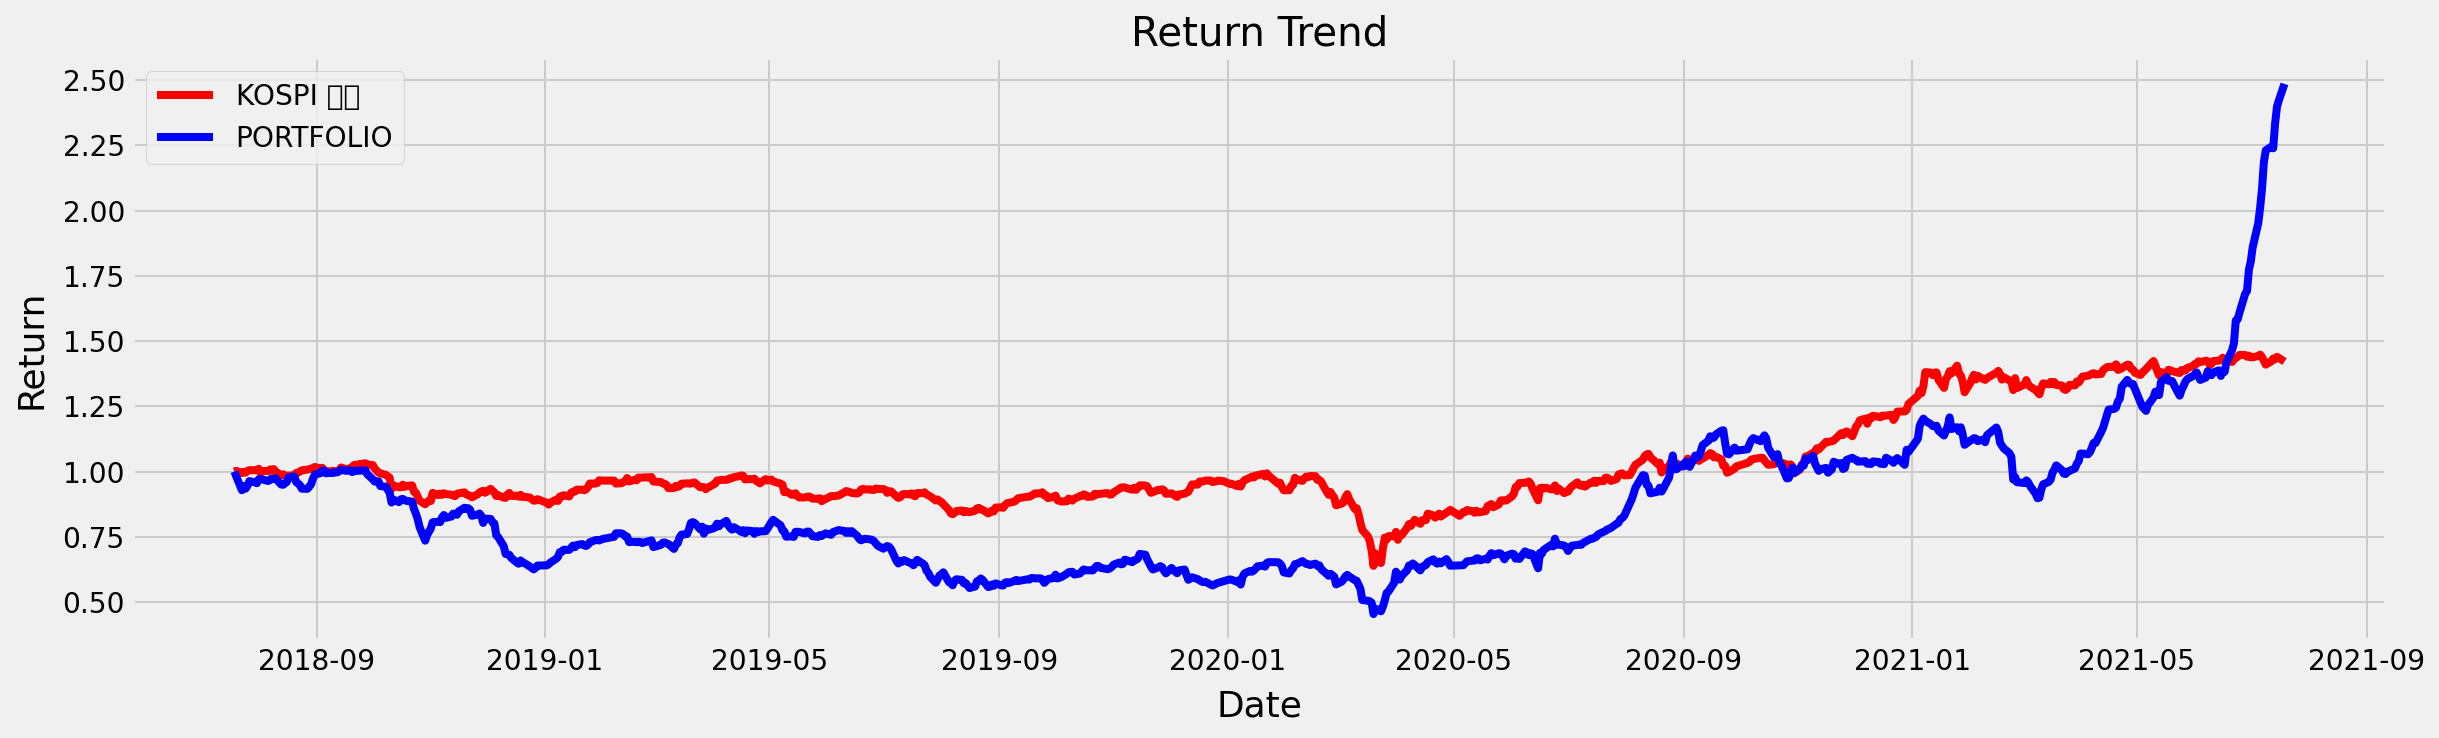

In [83]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

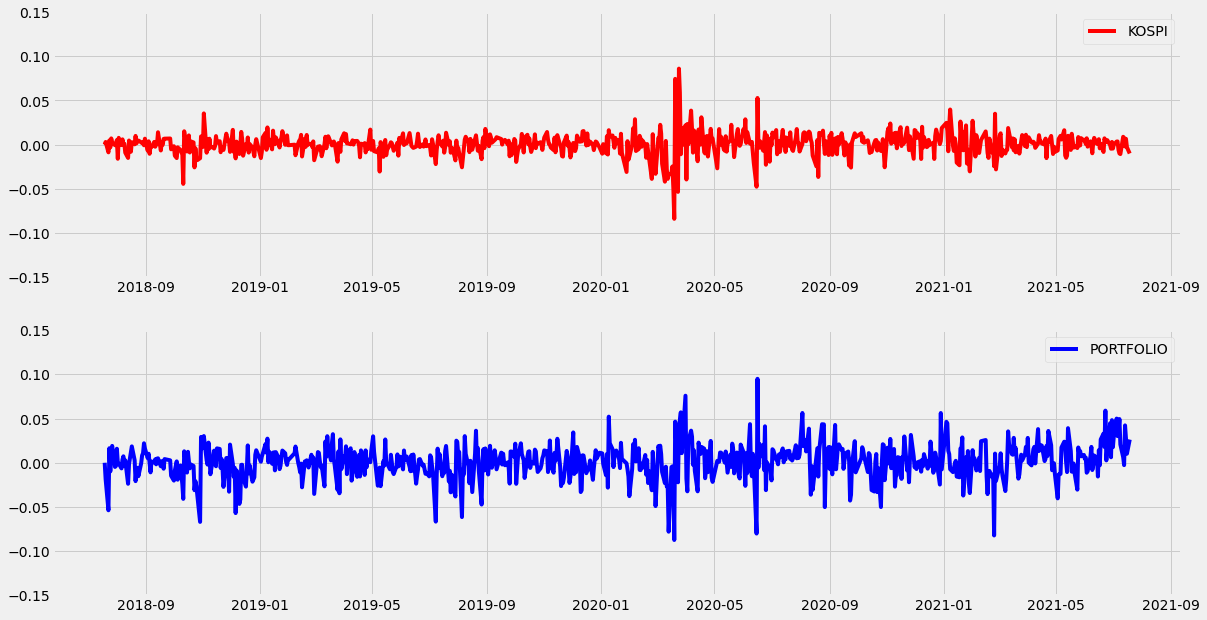

In [76]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)

plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [77]:
print('----- 1 months momentum portfolio performance -----')
# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)

# Show RMSE
print('Allocation has RMSE: {:.3f}'.format(rmse))

----- 1 months momentum portfolio performance -----
Funds Remaining:  8170.0  KRW
Expected annual return: 72.5%
Annual volatility: 29.9%
Sharpe Ratio: 2.36
Allocation has RMSE: 0.000
